<a href="https://colab.research.google.com/github/ruhullahil/gcolab/blob/master/banglahandwriten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import backend as K

import numpy as np
from pathlib import Path
import os
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook 
from sklearn.model_selection import train_test_split

from keras.utils import np_utils

# Disable Warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Importing sequential model
from tensorflow.keras.models import Sequential

# Importing convolutional layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.layers import BatchNormalization

from tensorflow.python.keras.layers import Input, Dense, Activation, Flatten, Dropout

# Importing MNIST dataset
from tensorflow.keras.datasets import mnist

# Importing optimizers
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

# One Hot Encoding (OHE)
from tensorflow.keras.utils import to_categorical

# Importing numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


Using TensorFlow backend.


In [0]:
!unzip '/content/reshaped.zip'

Archive:  /content/reshaped.zip
   creating: reshaped/
  inflating: reshaped/0_0.jpg        
  inflating: reshaped/0_1.jpg        
  inflating: reshaped/0_10.jpg       
  inflating: reshaped/0_100.jpg      
  inflating: reshaped/0_101.jpg      
  inflating: reshaped/0_102.jpg      
  inflating: reshaped/0_11.jpg       
  inflating: reshaped/0_12.jpg       
  inflating: reshaped/0_13.jpg       
  inflating: reshaped/0_14.jpg       
  inflating: reshaped/0_15.jpg       
  inflating: reshaped/0_16.jpg       
  inflating: reshaped/0_17.jpg       
  inflating: reshaped/0_18.jpg       
  inflating: reshaped/0_19.jpg       
  inflating: reshaped/0_2.jpg        
  inflating: reshaped/0_20.jpg       
  inflating: reshaped/0_21.jpg       
  inflating: reshaped/0_22.jpg       
  inflating: reshaped/0_23.jpg       
  inflating: reshaped/0_24.jpg       
  inflating: reshaped/0_25.jpg       
  inflating: reshaped/0_26.jpg       
  inflating: reshaped/0_27.jpg       
  inflating: reshaped/0_28.jpg   

In [0]:
'''
0 : ka
1 : kha
2 : ta
3 : tha
4 : da

0_number.jpg

'''

def getClass(fileDir):
    fileDir = str(fileDir)
    name = (fileDir.split('_')[0]).split('/')[-1]
    return int(name)

# Image dimention: (total_image, width, height)
def plotFigs(images, rows=1, columns=1, title=None):
    fig=plt.figure(figsize=(10, 4))
    if title:
        fig.suptitle(title)
    
    for i, img in enumerate(images):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img, cmap='gray')

    plt.show()

In [0]:
fileDirectories = [filedir for filedir in Path('/content/reshaped').glob('*.jpg')]
print(len(fileDirectories), 'files found')

311 files found


In [0]:
imgs = []
imgClass = []

for imgDir in tqdm_notebook(fileDirectories):
    img = np.array(Image.open(imgDir))
    imgs.append(img)
    imgClass.append(getClass(imgDir))

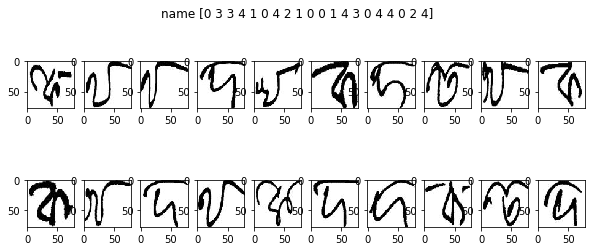

In [0]:
imgs = np.array(imgs)
imgClass = np.array(imgClass)
plotFigs(imgs[:20], 2, 10, "name {}".format(imgClass[:20]))

In [0]:
#Define ConvNet
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        
        # Conv -> ReLU -> Pooling
        model.add(Conv2D(32, kernel_size=5, padding='same', input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))
        '''
        # Conv -> ReLU -> Pooling
        model.add(Conv2D(16, kernel_size=5, input_shape='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
      
        model.add(Conv2D(16, kernel_size=5, input_shape='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
         '''                 
        # Flattern -> ReLU
        model.add(Flatten())
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        model.add(Dense(40))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # SoftMax
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        model.summary()
        return model

In [0]:
#model = LeNet.build()
X_train, X_test, y_train, y_test = train_test_split(imgs, imgClass, test_size=0.33, random_state=42)

print(len(np.unique(imgClass)), len(np.unique(y_test)), len(np.unique(y_train)))

print(y_train.shape)

#y_train = np.reshape(y_train, (len(y_train), -1))
#y_test = np.reshape(y_test, (len(y_test), -1))

print(y_train.shape, y_test.shape)
print(y_train[0])

5 5 5
(208,)
(208,) (103,)
0


In [0]:
# Constants & Hyper-Parameters
NB_EPOCH = 7
BATCH_SIZE = 64
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = X_train.shape[1:]
NB_CLASSES = len(np.unique(imgClass))+1
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

In [0]:
# Setting Image ordering to theano : (channels, rows, columns)
# Updated keras uses this command
K.set_image_data_format('channels_first')
#K.set_image_dim_ordering('th')

# Normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape, 'train samples previous')
# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
print(X_train.shape, 'train samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

(208, 78, 78) train samples previous
(208, 1, 78, 78) train samples


In [0]:
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)

model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, 
              metrics=["accuracy"])

history = model.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=1, validation_split=VALIDATION_SPLIT,
                   use_multiprocessing=True)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)

print("Test score:", score[0], '\nTest accuracy:', score[1])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 78, 78)        832       
_________________________________________________________________
activation (Activation)      (None, 32, 78, 78)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 78, 78)        312       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 39, 39)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 39, 39)        0         
_________________________________________________________________
flatten (Flatten)            (None, 48672)             0         
_________________________________________________________________
activation_1 (Activation)    (None, 48672)             0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


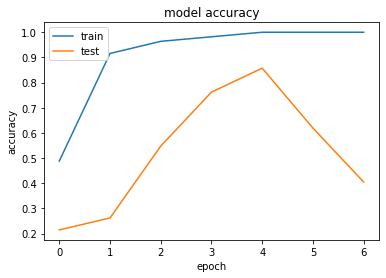

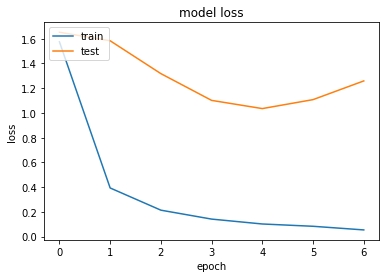

In [0]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()